In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(tidyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(umap)))
# Load necessary packages
suppressWarnings(suppressPackageStartupMessages(library(factoextra)))


In [2]:
# set path to the data
file_path <- file.path("..","..","data", "5.converted_data","normalized_feature_selected_output.parquet")

# read the data
df <- arrow::read_parquet(file_path)
head(df)

Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_Object_ConvertImageToObjects_Number_Object_Number,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_Y_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,118.6411,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,162.3042,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,159.4445,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,185.4864,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,105.2665,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,173.5103,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


In [3]:
# split the data into metadata and features
metadata_df <- df %>% select(contains("Metadata"))
features_df <- df %>% select(-contains("Metadata"))
print(dim(metadata_df))
print(dim(features_df))

[1] 136  24
[1] 136 245


### UMAP of genotype

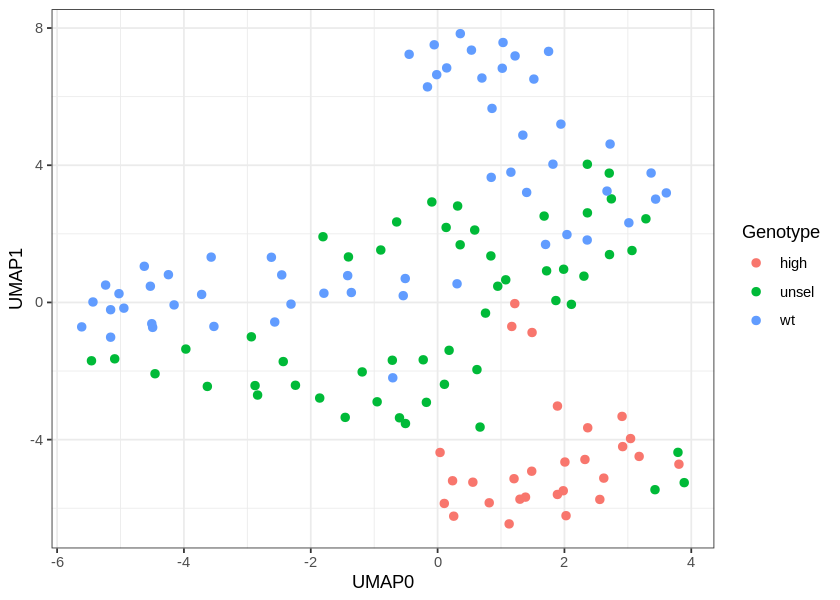

In [4]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Identity and Genotype

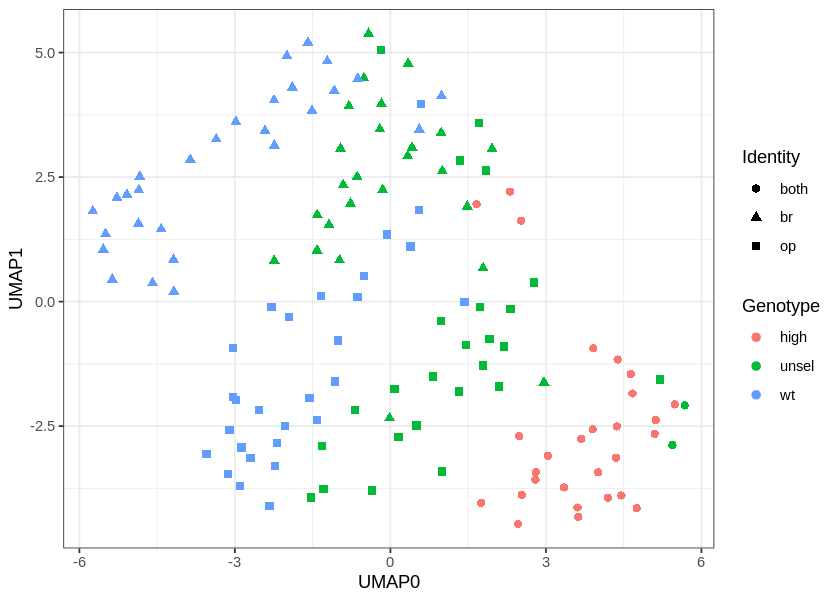

In [5]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_bone.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Side and Genotype

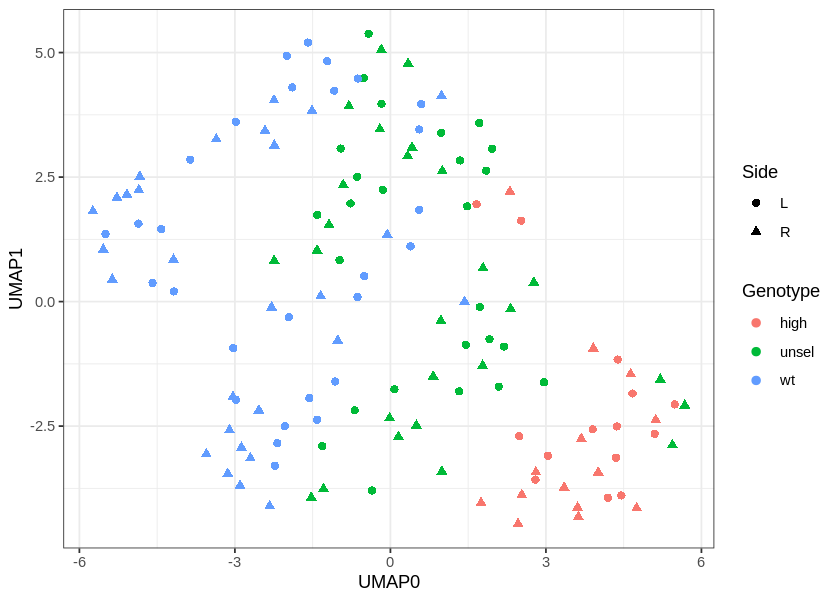

In [6]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_side))
    + geom_point(size = 2)
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_side.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



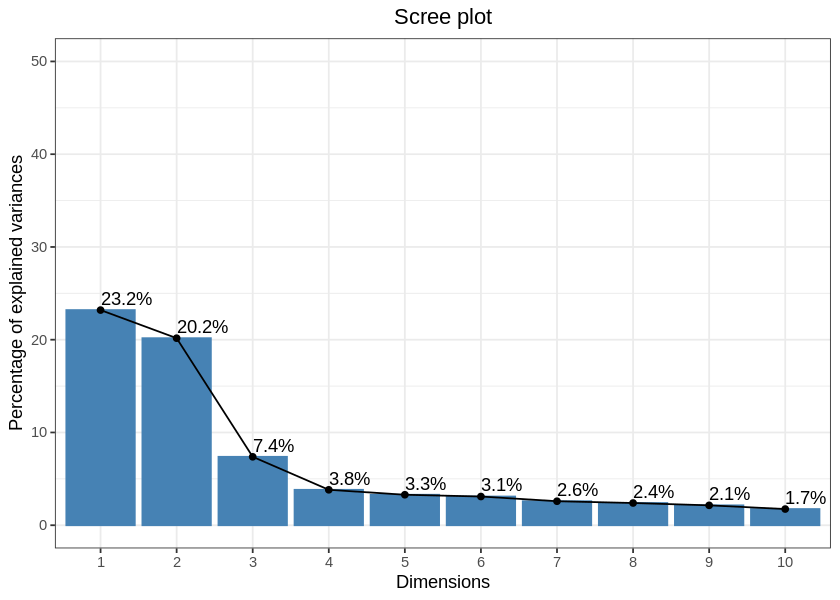

In [7]:

# Apply PCA
res.pca <- prcomp(features_df, scale = TRUE)

# Create scree plot
scree_plot <- fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))
scree_plot <- (
    scree_plot
    + theme_bw()
    # title centered
    + theme(plot.title = element_text(hjust = 0.5))
)
scree_plot
# save the plot
ggsave("scree_plot.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)

### PCA with genotype

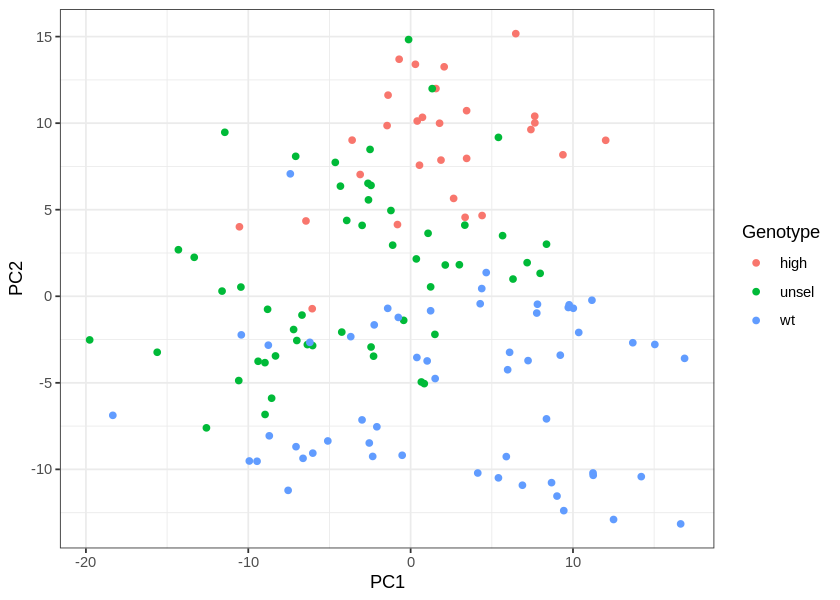

In [8]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Identity and Genotype

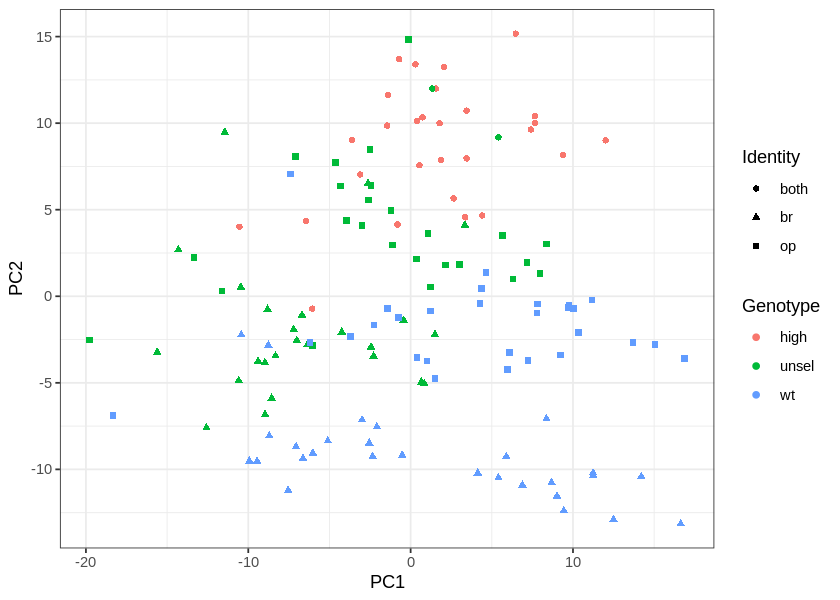

In [9]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_bone.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Side and Genotype

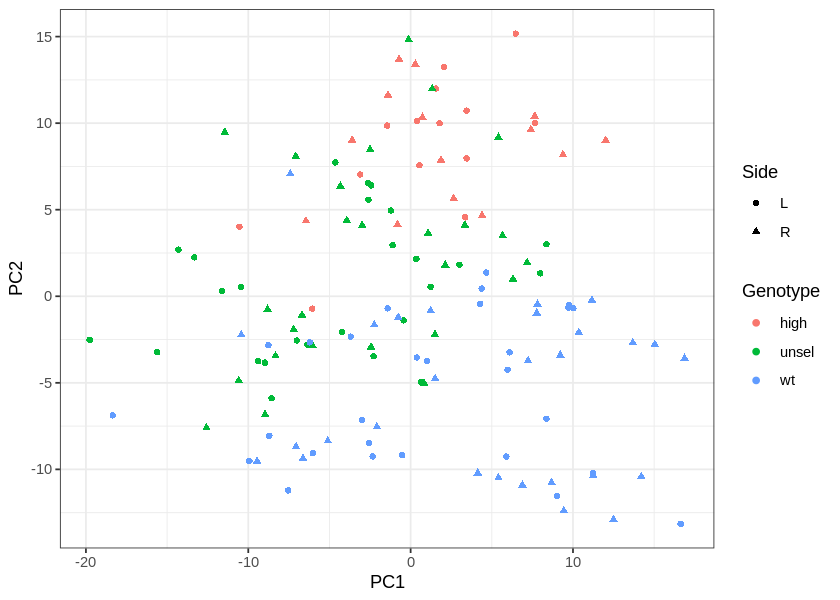

In [10]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_side))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_side.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


In [11]:
# split the data by genotype
unique(df$Metadata_genotype)
# remove metadata columns
tmp_df <- df %>% select(-contains("Metadata"))
tmp_df$Metadata_genotype <- df$Metadata_genotype
tmp_df$Metadata_identity <- df$Metadata_identity

agg_df <- tmp_df %>% group_by(Metadata_identity, Metadata_genotype) %>% summarize_all(c("mean", "sd"))
# remove grouping
agg_df <- agg_df %>% ungroup()
agg_df


[1] "high"  "unsel" "wt"

Metadata_identity,Metadata_genotype,Image_Count_ConvertImageToObjects_mean,AreaShape_Area_mean,AreaShape_CentralMoment_0_0_mean,AreaShape_CentralMoment_0_1_mean,AreaShape_CentralMoment_0_2_mean,AreaShape_CentralMoment_0_3_mean,AreaShape_CentralMoment_1_0_mean,AreaShape_CentralMoment_1_1_mean,⋯,Texture_SumEntropy_OP_3_02_256_sd,Texture_SumEntropy_OP_3_03_256_sd,Texture_SumVariance_OP_3_00_256_sd,Texture_SumVariance_OP_3_01_256_sd,Texture_SumVariance_OP_3_02_256_sd,Texture_SumVariance_OP_3_03_256_sd,Texture_Variance_OP_3_00_256_sd,Texture_Variance_OP_3_01_256_sd,Texture_Variance_OP_3_02_256_sd,Texture_Variance_OP_3_03_256_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
both,high,-0.2505075,1.4362386,1.4362386,-0.061213091,1.1316994,-0.131652375,-0.039943508,-1.00880048,⋯,0.6117827,0.6086640,0.8454123,0.8480665,0.8216767,0.8392149,0.8053299,0.7987709,0.8082156,0.7997198
both,unsel,-0.6457694,1.8982559,1.8982559,-2.841773705,2.6356720,3.589966147,-0.577878278,-2.17763178,⋯,0.2800059,0.2943854,0.6191658,0.6292972,0.6109477,0.6298066,0.5923179,0.5883276,0.5886807,0.5932903
br,unsel,0.5466464,-0.6494553,-0.6494553,0.023679158,-0.5489685,0.020013176,-0.141039635,0.13209684,⋯,0.8111755,0.8016307,0.3466328,0.3609175,0.3444232,0.3296973,0.3425150,0.3439972,0.3459618,0.3437349
br,wt,-0.3397602,-0.8591976,-0.8591976,0.047023482,-0.6858980,-0.001567181,0.087914618,0.01373204,⋯,1.1299260,1.1355912,1.0484553,0.9168572,1.1088977,1.1276552,1.1559083,1.1831724,1.1512681,1.1432411
op,unsel,0.5466464,0.1872720,0.1872720,-0.008125513,0.2132491,0.036803320,0.123839262,0.31290571,⋯,1.0212556,1.0386846,0.8803851,0.8891408,0.8463899,0.8616907,0.8344051,0.8312373,0.8383868,0.8365028
op,wt,-0.3397602,-0.2999670,-0.2999670,0.203286262,-0.3343143,-0.173935612,0.008663385,0.75328986,⋯,0.9532833,0.9492253,1.2403516,1.2959517,1.2477156,1.2143657,1.2262186,1.2122997,1.2246209,1.2349764


# All EDA performed on manual feature selection

In [12]:
# set path to the data
file_path <- file.path("..","..","data", "5.converted_data","normalized_manual_feature_selected_output.parquet")

# read the data
df <- arrow::read_parquet(file_path)
head(df)

Image_Count_ConvertImageToObjects,AreaShape_Area,AreaShape_Compactness,AreaShape_ConvexArea,AreaShape_Eccentricity,AreaShape_EquivalentDiameter,AreaShape_FormFactor,AreaShape_HuMoment_0,AreaShape_HuMoment_1,AreaShape_HuMoment_2,⋯,RadialDistribution_MeanFrac_OP_2of4,RadialDistribution_MeanFrac_OP_3of4,RadialDistribution_MeanFrac_OP_4of4,RadialDistribution_RadialCV_OP_1of4,RadialDistribution_RadialCV_OP_2of4,RadialDistribution_RadialCV_OP_3of4,RadialDistribution_RadialCV_OP_4of4,Metadata_genotype,Metadata_side,Metadata_identity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
-0.8242748,1.7062336,-1.0946630,1.5267377,-0.3646179,1.6040166,1.301326483,-0.8505173,-0.6439171,-0.9304764,⋯,-1.4141814,-1.0813624,1.4725468,0.721203624,1.01933662,1.4136517,1.4325833,high,L,both
-0.8242748,0.7716744,-1.0749513,0.7539925,0.1690086,0.8928066,1.255925046,-0.6799504,-0.5736594,-0.9153793,⋯,-1.3369640,-1.5184304,1.6396414,1.061081351,0.23000074,0.7981232,1.3723331,high,R,both
-0.4672640,2.1808575,-0.2966127,2.4086201,-2.9373126,1.9237911,-0.006871006,-0.9334970,-0.7014174,-0.9479189,⋯,0.3330794,-0.4245064,-0.3254008,1.638487291,1.21338886,0.1522240,0.2303339,high,L,both
-0.8242748,2.0815568,-1.2143221,2.0253448,-0.8354232,1.8587312,1.598488818,-0.9152581,-0.6692863,-0.9750044,⋯,-1.3757325,-1.3668256,1.7823085,-0.433300716,-0.05436085,0.9076824,1.1385302,high,R,both
-0.1102533,0.6593682,-1.1889606,0.5044074,0.3919800,0.7977066,1.532220049,-0.5576464,-0.5116152,-0.7973963,⋯,-1.3117404,-1.1769029,1.3657797,0.003004767,0.40706654,1.0319502,1.0722050,high,L,both
-0.8242748,1.7431080,-1.1543990,1.6862199,-0.9851928,1.6297006,1.444849359,-0.9232483,-0.6741598,-0.9345940,⋯,-1.1755967,-0.8047828,1.1799261,-0.911442753,-0.58553633,0.3651254,0.6007558,high,R,both


In [13]:
# split the data into metadata and features
metadata_df <- df %>% select(contains("Metadata"))
features_df <- df %>% select(-contains("Metadata"))
print(dim(metadata_df))
print(dim(features_df))

[1] 136   3
[1] 136  65


### UMAP of genotype

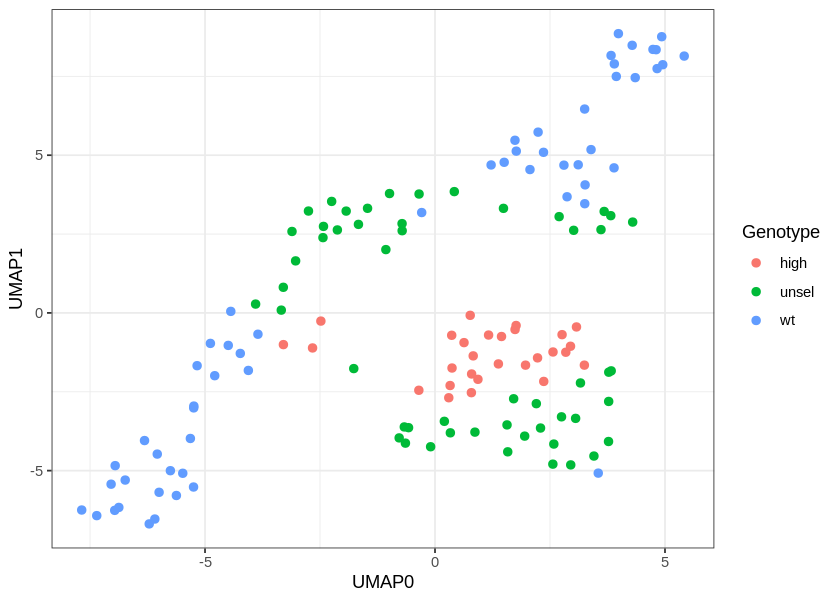

In [14]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP of each fish

In [24]:
head(df)

Image_Count_ConvertImageToObjects,AreaShape_Area,AreaShape_Compactness,AreaShape_ConvexArea,AreaShape_Eccentricity,AreaShape_EquivalentDiameter,AreaShape_FormFactor,AreaShape_HuMoment_0,AreaShape_HuMoment_1,AreaShape_HuMoment_2,⋯,RadialDistribution_MeanFrac_OP_2of4,RadialDistribution_MeanFrac_OP_3of4,RadialDistribution_MeanFrac_OP_4of4,RadialDistribution_RadialCV_OP_1of4,RadialDistribution_RadialCV_OP_2of4,RadialDistribution_RadialCV_OP_3of4,RadialDistribution_RadialCV_OP_4of4,Metadata_genotype,Metadata_side,Metadata_identity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
-0.8242748,1.7062336,-1.0946630,1.5267377,-0.3646179,1.6040166,1.301326483,-0.8505173,-0.6439171,-0.9304764,⋯,-1.4141814,-1.0813624,1.4725468,0.721203624,1.01933662,1.4136517,1.4325833,high,L,both
-0.8242748,0.7716744,-1.0749513,0.7539925,0.1690086,0.8928066,1.255925046,-0.6799504,-0.5736594,-0.9153793,⋯,-1.3369640,-1.5184304,1.6396414,1.061081351,0.23000074,0.7981232,1.3723331,high,R,both
-0.4672640,2.1808575,-0.2966127,2.4086201,-2.9373126,1.9237911,-0.006871006,-0.9334970,-0.7014174,-0.9479189,⋯,0.3330794,-0.4245064,-0.3254008,1.638487291,1.21338886,0.1522240,0.2303339,high,L,both
-0.8242748,2.0815568,-1.2143221,2.0253448,-0.8354232,1.8587312,1.598488818,-0.9152581,-0.6692863,-0.9750044,⋯,-1.3757325,-1.3668256,1.7823085,-0.433300716,-0.05436085,0.9076824,1.1385302,high,R,both
-0.1102533,0.6593682,-1.1889606,0.5044074,0.3919800,0.7977066,1.532220049,-0.5576464,-0.5116152,-0.7973963,⋯,-1.3117404,-1.1769029,1.3657797,0.003004767,0.40706654,1.0319502,1.0722050,high,L,both
-0.8242748,1.7431080,-1.1543990,1.6862199,-0.9851928,1.6297006,1.444849359,-0.9232483,-0.6741598,-0.9345940,⋯,-1.1755967,-0.8047828,1.1799261,-0.911442753,-0.58553633,0.3651254,0.6007558,high,R,both


In [23]:
# split the data by genotype
unique(df$Metadata_genotype)
# remove metadata columns
tmp_df <- df %>% select(-contains("Metadata"))
tmp_df$Metadata_genotype <- df$Metadata_genotype
tmp_df$Metadata_identity <- df$Metadata_identity

agg_df <- tmp_df %>% group_by(Metadata_identity, Metadata_genotype) %>% summarize_all(c("mean", "sd"))
# remove grouping
agg_df <- agg_df %>% ungroup()
agg_df


[1] "high"  "unsel" "wt"

Metadata_identity,Metadata_genotype,Image_Count_ConvertImageToObjects_mean,AreaShape_Area_mean,AreaShape_Compactness_mean,AreaShape_ConvexArea_mean,AreaShape_Eccentricity_mean,AreaShape_EquivalentDiameter_mean,AreaShape_FormFactor_mean,AreaShape_HuMoment_0_mean,⋯,RadialDistribution_FracAtD_OP_3of4_sd,RadialDistribution_FracAtD_OP_4of4_sd,RadialDistribution_MeanFrac_OP_1of4_sd,RadialDistribution_MeanFrac_OP_2of4_sd,RadialDistribution_MeanFrac_OP_3of4_sd,RadialDistribution_MeanFrac_OP_4of4_sd,RadialDistribution_RadialCV_OP_1of4_sd,RadialDistribution_RadialCV_OP_2of4_sd,RadialDistribution_RadialCV_OP_3of4_sd,RadialDistribution_RadialCV_OP_4of4_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
both,high,-0.2505075,1.4362386,-0.7502616,1.3945559,-1.1708961,1.3743786,0.9382302,-0.8530367,⋯,0.94101953,0.7973449,0.9343138,0.9309401,0.8337494,1.0440413,0.8075464,0.8240678,0.71915107,0.7840294
both,unsel,-0.6457694,1.8982559,0.9920011,2.5757610,-1.1340575,1.7347553,-0.9890115,-0.7041254,⋯,0.05147045,0.0819453,0.2252563,0.4147533,0.2459142,0.3262081,1.0292176,0.8749900,0.06529045,0.4928101
br,unsel,0.5466464,-0.6494553,0.2572272,-0.6319076,0.4346390,-0.6990910,-0.2374059,0.3353608,⋯,1.48549127,1.5856523,1.1648558,1.1614289,1.4318843,1.2317447,1.1744744,1.1032098,0.80735091,0.7715688
br,wt,-0.3397602,-0.8591976,0.9944950,-0.9197256,0.9166830,-0.9448695,-0.9546201,1.4607456,⋯,0.68991469,0.6707514,0.7012975,0.6445974,0.6395791,0.4161985,0.8443960,0.7985639,0.76771854,0.6723764
op,unsel,0.5466464,0.1872720,-0.2021149,0.2073111,-0.3601131,0.2961557,0.1206618,-0.5696228,⋯,0.74331767,0.7627744,0.5630279,0.5643215,0.6359455,0.6744732,0.8831097,0.9082794,0.98045106,1.0481239
op,wt,-0.3397602,-0.2999670,-0.3642979,-0.2797092,0.2686763,-0.1936566,0.1912695,-0.3482517,⋯,0.44767216,0.5011378,0.9112058,0.8828458,0.7695593,0.8358057,1.1037797,1.1064906,1.03121881,0.9997488


In [ ]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)


### UMAP with Identity and Genotype

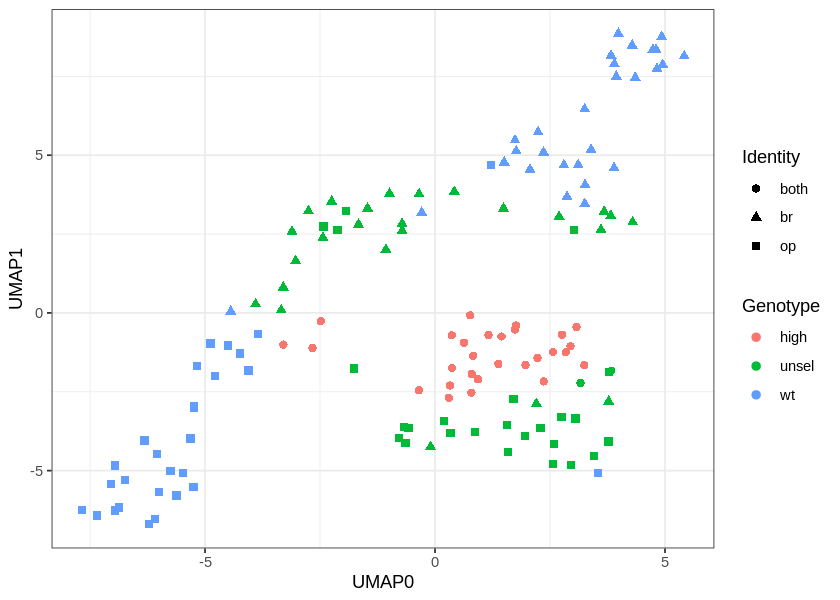

In [15]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_bone_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Side and Genotype

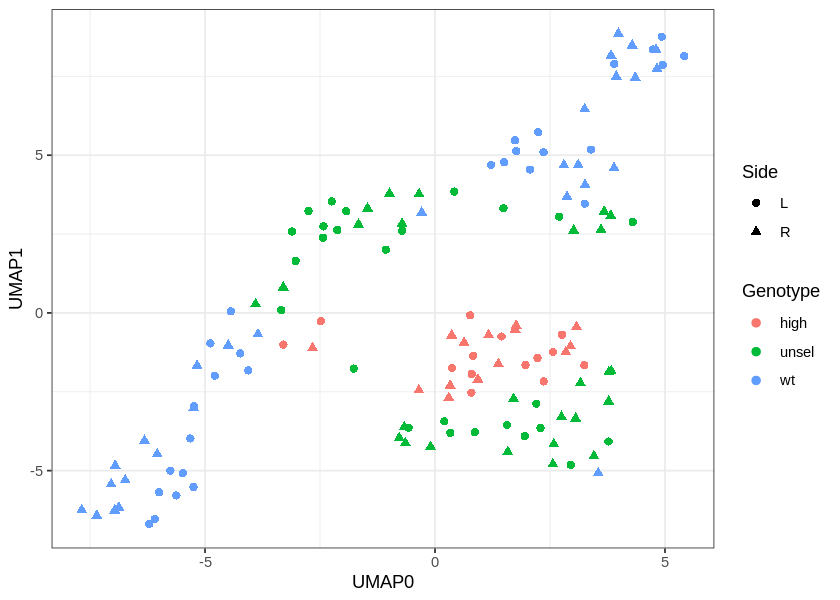

In [16]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_side))
    + geom_point(size = 2)
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_side_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



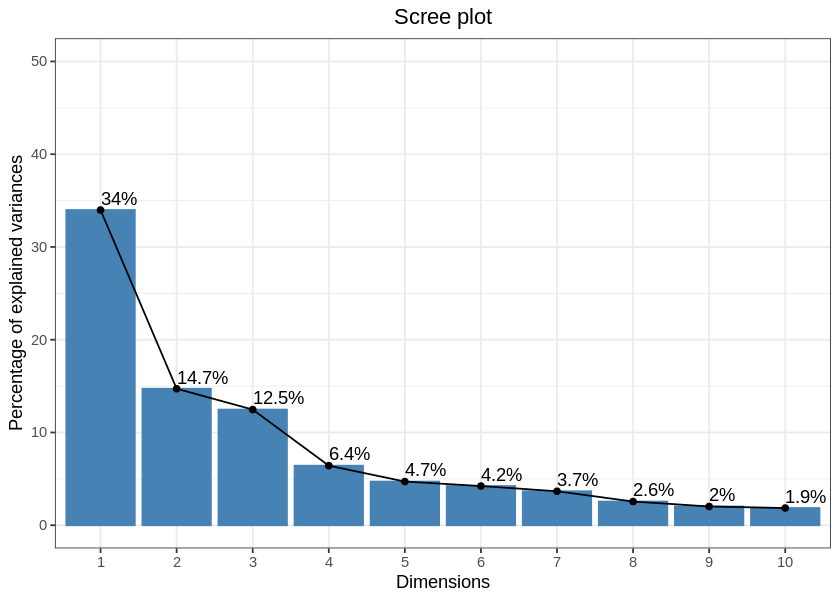

In [17]:

# Apply PCA
res.pca <- prcomp(features_df, scale = TRUE)

# Create scree plot
scree_plot <- fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))
scree_plot <- (
    scree_plot
    + theme_bw()
    # title centered
    + theme(plot.title = element_text(hjust = 0.5))
)
scree_plot
# save the plot
ggsave("scree_plot_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)

### PCA with genotype

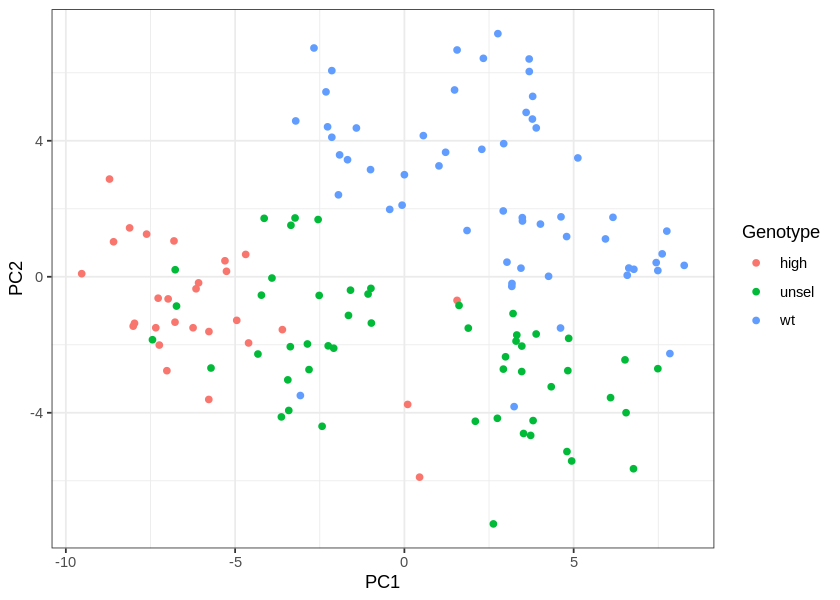

In [18]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Identity and Genotype

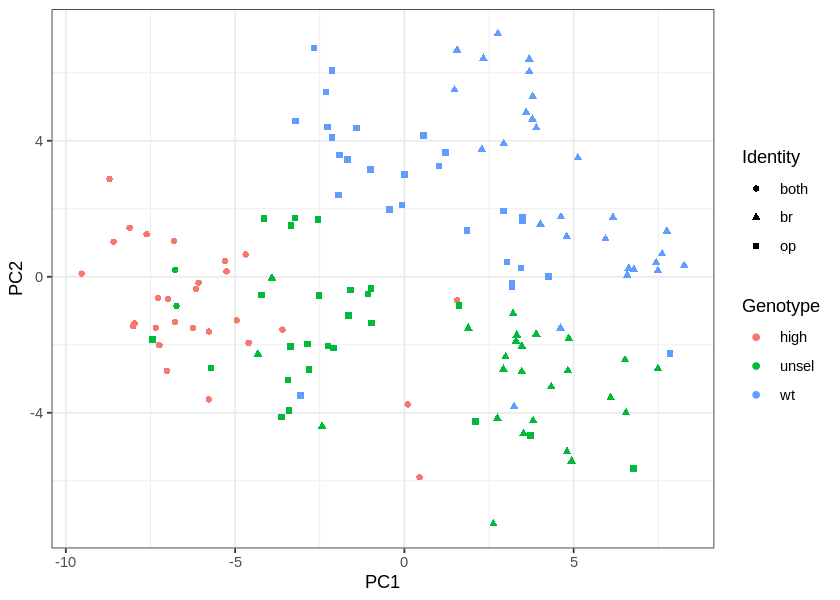

In [19]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_bone_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Side and Genotype

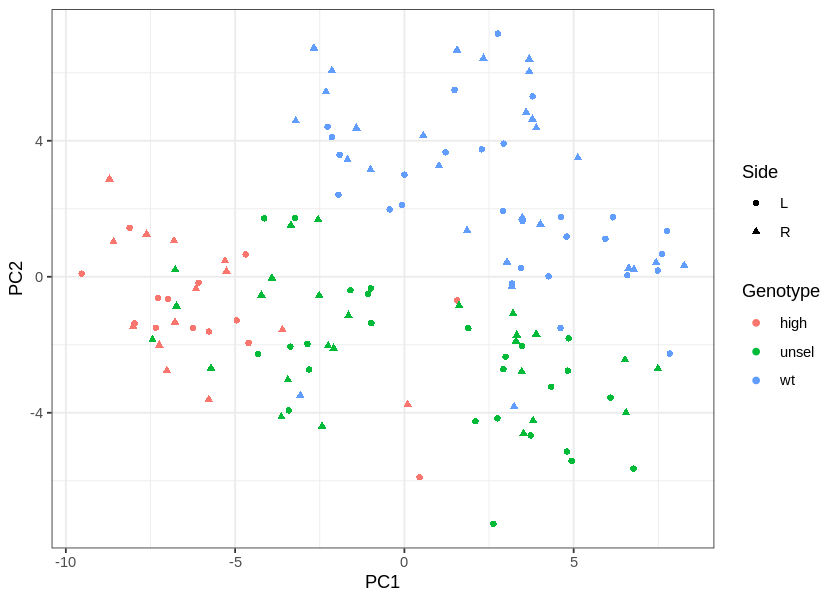

In [20]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_side))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_side_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


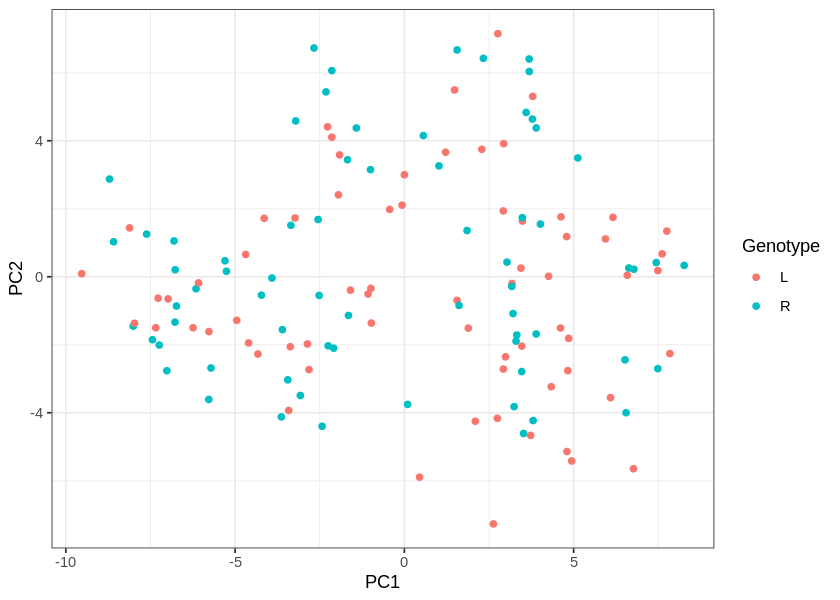

In [21]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_side))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
pca_plot
# save the plot
ggsave("pca_plot_side_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)
